In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv('/content/credit_card_default.csv')

### Data interpretation


In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
df.shape

(30000, 25)

In [17]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
for col in [  'SEX', 'EDUCATION', 'MARRIAGE',  'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']:
    print('unique values in',col,':',df[col].unique())

unique values in SEX : [2 1]
unique values in EDUCATION : [2 1 3 5 4 6 0]
unique values in MARRIAGE : [1 2 3]
unique values in PAY_1 : [ 2 -1  0 -2  1  3  4  8  7  5  6]
unique values in PAY_2 : [ 2  0 -1 -2  3  5  7  4  1  6  8]
unique values in PAY_3 : [-1  0  2 -2  3  4  6  7  1  5  8]
unique values in PAY_4 : [-1  0 -2  2  3  4  5  7  6  1  8]
unique values in PAY_5 : [-2  0 -1  2  3  5  4  7  8  6]
unique values in PAY_6 : [-2  2  0 -1  3  6  4  7  8  5]
unique values in default payment next month : [1 0]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


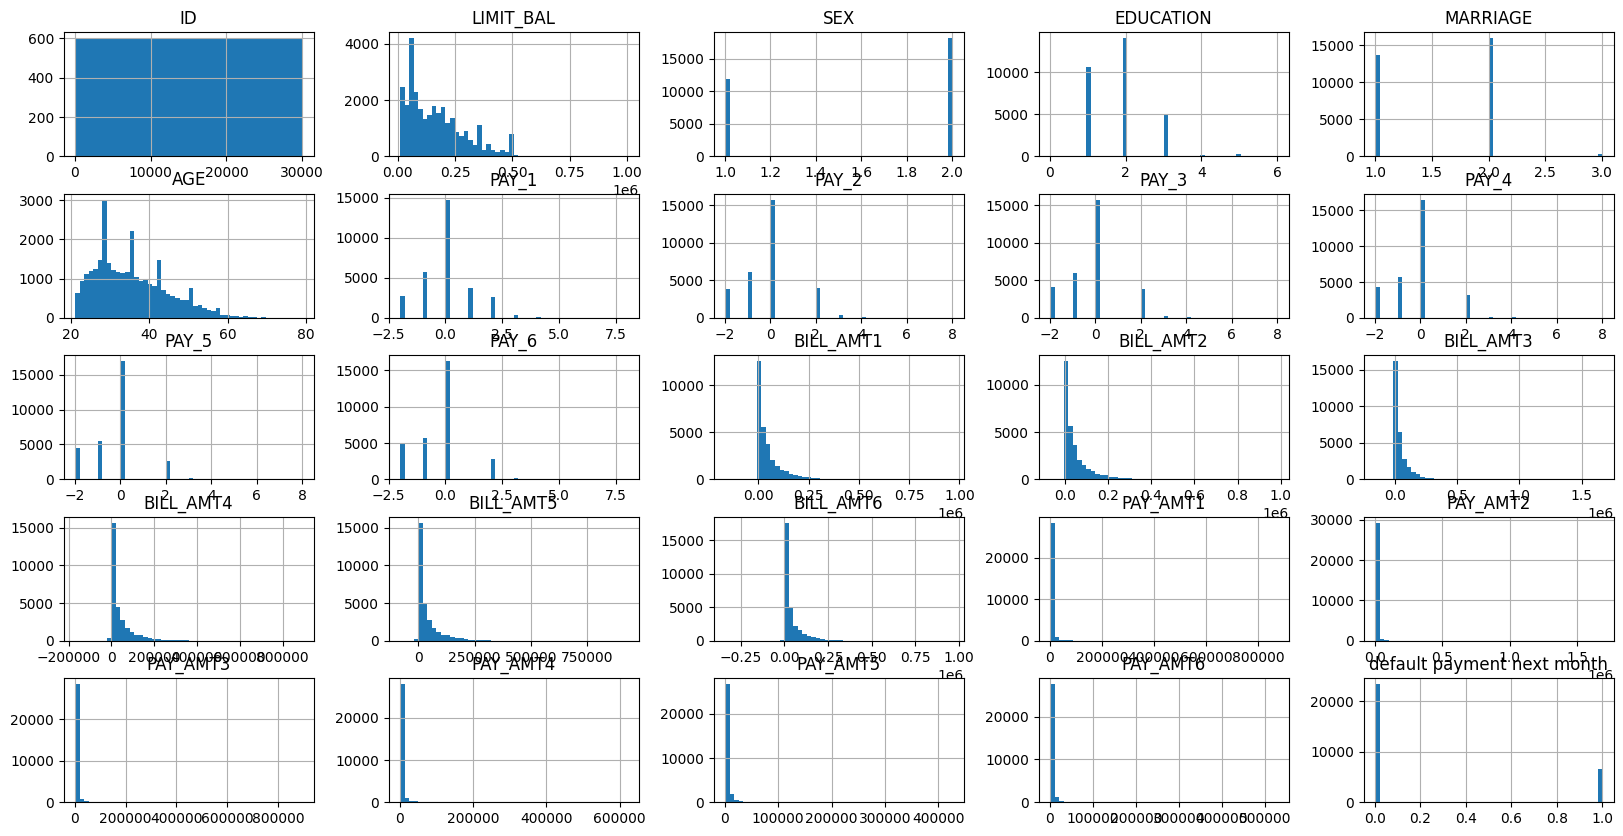

In [ ]:
df.hist(figsize=(20,10),bins=50);

In [ ]:
df.corrwith(df['default payment next month'])

ID                           -0.013952
LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.025586
AGE                           0.013890
PAY_1                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
dtype: float64

In [20]:
X=df.drop(["ID","default payment next month"],axis=1)
y=df['default payment next month']

#### Train-Test Split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [3]:
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV

In [ ]:
lg=LogisticRegression()
svc=SVC()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
xg=XGBClassifier()
kf=KFold(n_splits=5)

### Cross fitting validation

In [ ]:
score_lg=cross_val_score(lg,X_train,y_train,scoring='accuracy',cv=kf)
score_lg.mean()

0.7789583333333333

In [ ]:
score_svc=cross_val_score(svc,X_train,y_train,scoring='accuracy',cv=2)
score_svc.mean()

0.7791666666666667

In [ ]:
score_rf=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=5)
score_rf.mean()

0.8155416666666667

In [ ]:
score_rf

array([0.81645833, 0.82166667, 0.81479167, 0.81333333, 0.81145833])

In [ ]:
score_gb=cross_val_score(gb,X_train,y_train,scoring='accuracy',cv=5)
score_gb

array([0.82291667, 0.82916667, 0.81604167, 0.81208333, 0.81979167])

In [ ]:
score_gb.mean()

0.82

In [ ]:
score_ada=cross_val_score(ada,X_train,y_train,scoring='accuracy',cv=5)
score_ada.mean()

0.8161250000000001

In [ ]:
score_knn=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=5)
score_knn.mean()

0.7497083333333333

In [ ]:
score_xg=cross_val_score(xg,X_train,y_train,scoring='accuracy',cv=5)
score_xg.mean()

0.8127916666666668

### hyperparameter tuning

In [ ]:
parameters_knn={'weights':['uniform', 'distance']}

In [ ]:
random_search_knn=RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                param_distributions=parameters_knn,
                                verbose=1,n_jobs=-1,
                                n_iter=50)

In [ ]:
random_result=random_search_knn.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
print(random_result.best_params_)
print(random_result.best_score_)

{'weights': 'uniform'}
0.7497083333333333


In [ ]:
parameters_xgb={'booster':['gbtree','dart'],'max_depth':[10,20,30,40,50,60,70,80,90]}

In [ ]:
random_search_xgb=RandomizedSearchCV(estimator=XGBClassifier(),
                                param_distributions=parameters_xgb,
                                verbose=1,n_jobs=-1,
                                n_iter=50)

In [ ]:
random_result_xgb=random_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
print(random_result_xgb.best_params_)
print(random_result_xgb.best_score_)

{'max_depth': 10, 'booster': 'gbtree'}
0.8070833333333333


In [ ]:
 parameters_rf={'max_depth':[10,20,30,40,50,60,70,80,90],
           'criterion':['gini','entropy']}

In [ ]:
random_search_rf=RandomizedSearchCV(RandomForestClassifier(),
                        parameters_rf,cv=2,
                        scoring='accuracy',n_jobs=-1)

In [ ]:
random_result_rf_xgb=random_search_rf.fit(X_train,y_train)

In [ ]:
print(random_result_rf_xgb.best_params_)
print(random_result_rf_xgb.best_score_)

{'max_depth': 10, 'criterion': 'gini'}
0.8189166666666666


In [ ]:
parameters_gb={'max_depth':[10,20,30,40,50,60,70,80,90],
           'criterion':['friedman_mse','squared_error']}

In [ ]:
random_search_gb=RandomizedSearchCV(GradientBoostingClassifier(),
                        parameters_gb,cv=2,
                        scoring='accuracy',n_jobs=-1)

In [ ]:
random_result_gb=random_search_gb.fit(X_train,y_train)

In [ ]:
print(random_result_gb.best_params_)
print(random_result_gb.best_score_)

{'max_depth': 10, 'criterion': 'friedman_mse'}
0.8122916666666666


In [ ]:
score_rf1=cross_val_score(RandomForestClassifier(max_depth=10, criterion='entropy'),X_train,y_train,scoring='accuracy',cv=5)

In [ ]:
print(score_rf1)
print('average score is',score_rf1.mean())

[0.82208333 0.82416667 0.82083333 0.81145833 0.818125  ]
average score is 0.8193333333333334


In [4]:
model=RandomForestClassifier(max_depth=10, criterion='entropy')

### Final Fit and Prediction

In [22]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8211666666666667